In [25]:
import cv2 
import matplotlib.pyplot as plt 

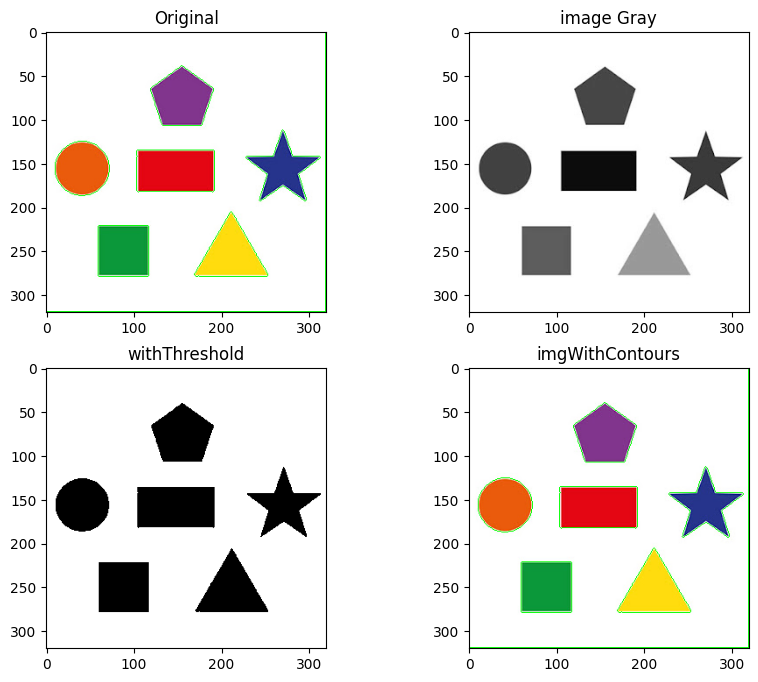

In [26]:
img = cv2.imread(r"C:\Users\aliay\OneDrive\Desktop\py_test\computer vision\dataset\shappes.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(imgGray,240,255,cv2.THRESH_BINARY)
# (cv2.RETR_TREE) is used to retrieves all of the contours and reconstructs a full hierarchy of nested contours. The hierarchy is useful when you have contours within contours (for example, if one object is inside another).
# (cv2.CHAIN_APPROX_NONE) used means that all the boundary points of the contours will be stored in the output contours variable (contours). No approximation is made, and every point along the boundary is retained.
contours ,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# -1 >> to draw all contours
# 1 >> Thickness
imgWithContours = cv2.drawContours(img,contours,-1,(0,255,0),1)

plt.figure(figsize=(10,8))

plt.subplot(221), plt.imshow(img), plt.title("Original")
plt.subplot(222), plt.imshow(imgGray,"gray"), plt.title("image Gray")
plt.subplot(223), plt.imshow(thresh,"gray"), plt.title("withThreshold")
plt.subplot(224), plt.imshow(imgWithContours), plt.title("imgWithContours")

plt.show()

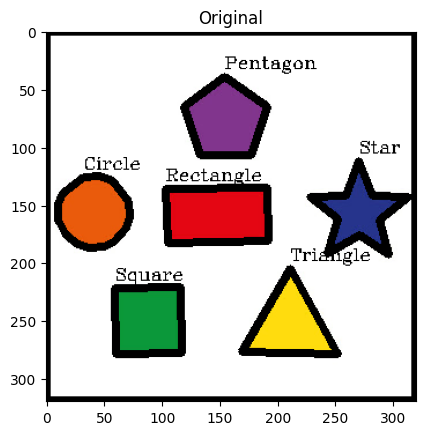

In [27]:
# cv2.approxPolyDP: This function is used for approximating a polygonal curve. It takes three arguments:
# contour: The input contour that you want to approximate.
# epsilon: Parameter specifying the approximation accuracy. It is the maximum distance between the original curve and its approximation. In this case, it's set to 0.01 * cv2.arcLength(contour, True), which means the approximation accuracy is 1% of the arc length of the contour.
# closed: A boolean parameter that indicates whether the approximated polygon should be closed or not. In this case, it's set to True, indicating that the output polygon should be a closed contour.
# cv2.arcLength: This function calculates the contour perimeter (arc length). It takes two arguments:
# contour: The input contour for which you want to calculate the arc length.
# closed: A boolean parameter indicating whether the contour is closed or not. In this case, it's set to True.

for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    cv2.drawContours(img,[approx],-1,(0,0,0),5)
    # Retrieves the first element of the flattened array (x and y ) coordinates 
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 7

    if len(approx) == 3:
        # print(approx)
        # 0.5 >>> is a font Scale 
        cv2.putText(img,"Triangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    elif len(approx) == 4:
        x1,y1,w,h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        # Check if is it a rectangle or a square
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            cv2.putText(img,"Square",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        else:
             cv2.putText(img,"Rectangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))  
    elif len(approx) == 5:     
         cv2.putText(img,"Pentagon",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))  
    elif len(approx) == 10:     
         cv2.putText(img,"Star",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))  
    else:     
         cv2.putText(img,"Circle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))  


plt.subplot(111), plt.imshow(img), plt.title("Original")
plt.show()

